# https://github.com/justmarkham
http://www.dataschool.io

http://pandas.pydata.org/pandas-docs/version/0.20.3/whatsnew.html

In [53]:
import pandas as pd
import tushare as ts
import numpy as np

print('numpy version:  ', np.__version__)
print('pandas version: ', pd.__version__)

numpy version:   1.12.1
pandas version:  0.20.3


# How do I select a pandas Series from a DataFrame

Read_table is similar to read_csv, the default sep is '\t' while the default sep is ',' in read_csv.

If the colume name incluede space or is the key words of pandas, you should ues stock['volume_name'] 

In [54]:
# 贵州茅台
gzmt = ts.get_hist_data('600519')
gzmt.to_csv('600519.csv')

In [57]:
stock = pd.read_table('600519.csv',sep=",")

# delete rows 20:end
row_del = np.arange(20,len(stock['volume'])+2)
row_list = row_del.tolist()

col_del = ['p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover']
stock.drop(row_list, axis=0, inplace=True)
stock.drop(col_del, axis=1, inplace=True)

print(stock.head())
type(stock)

         date    open    high   close     low    volume  price_change
0  2017-12-15  664.00  667.95  653.60  650.78  32255.95        -10.95
1  2017-12-14  669.98  671.30  664.68  660.50  31967.94         -3.53
2  2017-12-13  654.99  670.00  668.20  650.72  48502.48         16.88
3  2017-12-12  658.70  658.77  651.18  651.02  47889.31          0.19
4  2017-12-11  631.00  651.95  651.00  631.00  72849.17         23.72


pandas.core.frame.DataFrame

In [58]:
stock.volume
# stock['volume']

0      32255.95
1      31967.94
2      48502.48
3      47889.31
4      72849.17
5      45503.39
6      51032.62
7      58174.09
8      47465.76
9      54267.71
10     47192.74
11     38019.62
12     46763.72
13     70291.83
14     63548.46
15     76541.94
16    109599.13
17    128498.26
18     96016.51
19     88305.82
Name: volume, dtype: float64

In [59]:
stock['mean'] = (stock['high']+stock['low'])/2.0
# add new columns

# Why do some pandas commands end with parentheses, and other commands don't?

In [60]:
print((stock.shape))
print(stock.dtypes)
print(stock.head())
print(stock.describe())
print(stock.describe(include=['object']))

(20, 8)
date             object
open            float64
high            float64
close           float64
low             float64
volume          float64
price_change    float64
mean            float64
dtype: object
         date    open    high   close     low    volume  price_change     mean
0  2017-12-15  664.00  667.95  653.60  650.78  32255.95        -10.95  659.365
1  2017-12-14  669.98  671.30  664.68  660.50  31967.94         -3.53  665.900
2  2017-12-13  654.99  670.00  668.20  650.72  48502.48         16.88  660.360
3  2017-12-12  658.70  658.77  651.18  651.02  47889.31          0.19  654.895
4  2017-12-11  631.00  651.95  651.00  631.00  72849.17         23.72  641.475
             open        high       close         low         volume  \
count   20.000000   20.000000   20.000000   20.000000      20.000000   
mean   644.585500  654.248000  643.075500  634.158500   62734.322500   
std     19.019883   18.707563   18.594124   16.912208   25954.243261   
min    615.420000  624.9

# How do I rename columns in a pandas DataFrame?

```python
DataFrame.rename(columns = {'Old':'New'})
new_columns = ['cols1', 'cols2,...]
DataFrame.columns = new_columns

data = pd.read_table(file/url,sep=",", header=0, names = new_colums)
```

In [61]:
stock.columns

Index(['date', 'open', 'high', 'close', 'low', 'volume', 'price_change',
       'mean'],
      dtype='object')

In [62]:
stock.rename(columns = {'price_change':'price change'}, inplace=True)
stock.columns

Index(['date', 'open', 'high', 'close', 'low', 'volume', 'price change',
       'mean'],
      dtype='object')

In [64]:
stock_cols = ['Date', 'Open', 'High', 'Close', 'Low', 'Volume', 'Price change', 'Mean']
stock.columns = stock_cols
stock.columns

Index(['Data', 'Open', 'High', 'Close', 'Low', 'Volume', 'Price change',
       'Mean'],
      dtype='object')

In [96]:
stock_cols = ['Date', 'Open', 'High', 'Close', 'Low', 'Volume', 'Price change', 'P change','Ma5','Ma10','Ma20','V ma5','V ma10','V ma20','Turnover']
stock = pd.read_table('600519.csv',sep=",", header=0, names = stock_cols)
#print(stock.head())
#stock.columns
stock.columns = stock.columns.str.replace(' ','_')
stock.columns

Index(['Date', 'Open', 'High', 'Close', 'Low', 'Volume', 'Price_change',
       'P_change', 'Ma5', 'Ma10', 'Ma20', 'V_ma5', 'V_ma10', 'V_ma20',
       'Turnover'],
      dtype='object')

# How do I remove columns from a pandas DataFrame?

```python
# drop cols
DataFrame.drop(['cols1','cols2', ...], axis=1, inplace=True)
# drop rows
DataFrame.drop([1,2, ...], axis=0, inplace=True)
```

In [97]:
print("Before Drop: ", stock.shape)
stock.drop(['Turnover','P_change'], axis=1, inplace=True)
stock.drop([0, 1], axis=0, inplace=True)
print("After Drop: ", stock.shape)
stock.head()

Before Drop:  (733, 15)
After Drop:  (731, 13)


,Date,Open,High,Close,Low,Volume,Price_change,Ma5,Ma10,Ma20,V_ma5,V_ma10,V_ma20
2,2017-12-13,654.99,670.00,668.20,650.72,48502.48,16.88,642.846,636.416,647.612,53155.39,51089.69,68752.01
3,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19,634.276,633.416,648.601,55089.72,50915.81,68578.70
4,2017-12-11,631.00,651.95,651.00,631.00,72849.17,23.72,630.630,633.119,649.985,55005.01,53156.06,68502.57
5,2017-12-08,615.42,628.85,627.16,615.42,45503.39,10.47,628.020,630.222,651.829,51288.71,52225.99,67353.60
6,2017-12-07,624.95,624.99,616.69,615.26,51032.62,-8.32,627.124,630.506,654.372,51626.58,55329.85,68782.36


# How do I sort a pandas DataFrame or Series?

## notice the two methods don't change the DataFrame
``` python
# return pd.Series
DataFrmae.cols_name.sort_values(ascending=False)
DataFrmae['cols_name'].sort_values(ascending=False)
# return pd.DataFrame
# you can sort with two columns
DataFrame.sort_values('cols_name', ascending = True)
DataFrame.sort_values(['cols_name1', 'cols_name2'])
```

In [98]:
row_del = np.arange(20,len(stock['Volume']))
row_list = row_del.tolist()

col_del = ['Ma5','Ma10','Ma20','V_ma5','V_ma10','V_ma20']
stock.drop(row_list, axis=0, inplace=True)
stock.drop(col_del, axis=1, inplace=True)
stock

,Date,Open,High,Close,Low,Volume,Price_change
2,2017-12-13,654.99,670.00,668.20,650.72,48502.48,16.88
3,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19
4,2017-12-11,631.00,651.95,651.00,631.00,72849.17,23.72
5,2017-12-08,615.42,628.85,627.16,615.42,45503.39,10.47
6,2017-12-07,624.95,624.99,616.69,615.26,51032.62,-8.32
7,2017-12-06,631.50,644.10,625.35,620.00,58174.09,-7.61
8,2017-12-05,634.00,647.40,632.95,630.13,47465.76,-4.84
9,2017-12-04,623.95,644.10,637.95,616.72,54267.71,15.60
10,2017-12-01,638.01,638.99,622.68,620.13,47192.74,-8.32
11,2017-11-30,635.51,648.48,631.00,626.00,38019.62,-7.12


In [70]:
# return pd.Series
stock['Volume'].sort_values(ascending=False)

17     128498.26
16     109599.13
18      96016.51
19      88305.82
15      76541.94
4       72849.17
13      70291.83
14      63548.46
732     60020.47
7       58174.09
9       54267.71
6       51032.62
2       48502.48
3       47889.31
8       47465.76
10      47192.74
12      46763.72
5       45503.39
731     38567.50
11      38019.62
Name: Volume, dtype: float64

In [71]:
# return pd.DataFrame
stock.sort_values('Volume', ascending = True)

,Data,Open,High,Close,Low,Volume,Price_change
11,2017-11-30,635.51,648.48,631.00,626.00,38019.62,-7.12
731,2014-12-18,179.69,182.20,179.34,179.00,38567.50,0.27
5,2017-12-08,615.42,628.85,627.16,615.42,45503.39,10.47
12,2017-11-29,649.94,651.97,638.20,634.01,46763.72,-10.03
10,2017-12-01,638.01,638.99,622.68,620.13,47192.74,-8.32
8,2017-12-05,634.00,647.40,632.95,630.13,47465.76,-4.84
3,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19
2,2017-12-13,654.99,670.00,668.20,650.72,48502.48,16.88
6,2017-12-07,624.95,624.99,616.69,615.26,51032.62,-8.32
9,2017-12-04,623.95,644.10,637.95,616.72,54267.71,15.60


# How do I filter rows of a pandas DataFrame by column value?

``` python
#Use pd.Series to chose the selected rows
bool_row = [True, False, ...]
is_row = pd.Series(bool_row)
DataFrame[is_row]
```

In [128]:
#stock.rename(columns={'Data':'Date'},inplace=True)

rows, cols = stock.shape
stock.reset_index(drop=True, inplace=True)

booleans = []
for i in stock.Open:
    if i>630:
        booleans.append(True)
    else:
        booleans.append(False)
#print(booleans[0:5])
#len(booleans)

open_price_high = pd.Series(booleans) 
stock[open_price_high]

,Date,Open,High,Close,Low,Volume,Price_change
0,2017-12-13,654.99,670.00,668.20,650.72,48502.48,16.88
1,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19
2,2017-12-11,631.00,651.95,651.00,631.00,72849.17,23.72
5,2017-12-06,631.50,644.10,625.35,620.00,58174.09,-7.61
6,2017-12-05,634.00,647.40,632.95,630.13,47465.76,-4.84
8,2017-12-01,638.01,638.99,622.68,620.13,47192.74,-8.32
9,2017-11-30,635.51,648.48,631.00,626.00,38019.62,-7.12
10,2017-11-29,649.94,651.97,638.20,634.01,46763.72,-10.03
12,2017-11-27,634.00,636.33,622.03,613.01,63548.46,-8.01
13,2017-11-24,635.90,642.50,630.00,622.23,76541.94,-3.73


In [129]:
open_price_high = stock.Open > 630
# the following two are the same
stock[open_price_high]
stock[stock.Open > 630]

,Date,Open,High,Close,Low,Volume,Price_change
0,2017-12-13,654.99,670.00,668.20,650.72,48502.48,16.88
1,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19
2,2017-12-11,631.00,651.95,651.00,631.00,72849.17,23.72
5,2017-12-06,631.50,644.10,625.35,620.00,58174.09,-7.61
6,2017-12-05,634.00,647.40,632.95,630.13,47465.76,-4.84
8,2017-12-01,638.01,638.99,622.68,620.13,47192.74,-8.32
9,2017-11-30,635.51,648.48,631.00,626.00,38019.62,-7.12
10,2017-11-29,649.94,651.97,638.20,634.01,46763.72,-10.03
12,2017-11-27,634.00,636.33,622.03,613.01,63548.46,-8.01
13,2017-11-24,635.90,642.50,630.00,622.23,76541.94,-3.73


# How do I apply multiple filter criteria to a pandas DataFrame?

``` python

DataFrame[criteria1 & criteria2]
DataFrame[criteria1 | criteria2]
DataFrame.columns_name.isin([value1, value2, value3])

```

In [132]:
stock[(stock.Open > 630) & (stock.Price_change < 10)]

,Date,Open,High,Close,Low,Volume,Price_change
1,2017-12-12,658.70,658.77,651.18,651.02,47889.31,0.19
5,2017-12-06,631.50,644.10,625.35,620.00,58174.09,-7.61
6,2017-12-05,634.00,647.40,632.95,630.13,47465.76,-4.84
8,2017-12-01,638.01,638.99,622.68,620.13,47192.74,-8.32
9,2017-11-30,635.51,648.48,631.00,626.00,38019.62,-7.12
10,2017-11-29,649.94,651.97,638.20,634.01,46763.72,-10.03
12,2017-11-27,634.00,636.33,622.03,613.01,63548.46,-8.01
13,2017-11-24,635.90,642.50,630.00,622.23,76541.94,-3.73
14,2017-11-23,642.00,646.00,633.49,630.22,109599.13,-17.03
15,2017-11-22,677.00,688.00,650.87,650.00,128498.26,-26.38


# How to read csv file with selected columns?

``` python
DataFrame = pd.read_csv(filename, usecols=['cols_name1',...])
DataFrame = pd.read_csv(filename, usecols=[pos1,...])
```

In [136]:
stock = pd.read_csv('600519.csv',sep=",", usecols=['date','open', 'close'], nrows = 20)
stock

,date,open,close
0,2017-12-15,664.00,653.60
1,2017-12-14,669.98,664.68
2,2017-12-13,654.99,668.20
3,2017-12-12,658.70,651.18
4,2017-12-11,631.00,651.00
5,2017-12-08,615.42,627.16
6,2017-12-07,624.95,616.69
7,2017-12-06,631.50,625.35
8,2017-12-05,634.00,632.95
9,2017-12-04,623.95,637.95


In [137]:
for index, row in stock.iterrows():
    print(index, row.date, row.open, row.close)

0 2017-12-15 664.0 653.6
1 2017-12-14 669.98 664.68
2 2017-12-13 654.99 668.2
3 2017-12-12 658.7 651.18
4 2017-12-11 631.0 651.0
5 2017-12-08 615.42 627.16
6 2017-12-07 624.95 616.69
7 2017-12-06 631.5 625.35
8 2017-12-05 634.0 632.95
9 2017-12-04 623.95 637.95
10 2017-12-01 638.01 622.68
11 2017-11-30 635.51 631.0
12 2017-11-29 649.94 638.2
13 2017-11-28 625.06 648.21
14 2017-11-27 634.0 622.03
15 2017-11-24 635.9 630.0
16 2017-11-23 642.0 633.49
17 2017-11-22 677.0 650.87
18 2017-11-21 669.0 677.0
19 2017-11-20 676.8 679.27


# Drop every non-numeric column from a DataFrame

Signature: stock.select_dtypes(include=None, exclude=None)

Docstring:

Return a subset of a DataFrame including/excluding columns based on
their ``dtype``.

In [139]:
stock.select_dtypes(include=[np.number])

,open,close
0,664.00,653.60
1,669.98,664.68
2,654.99,668.20
3,658.70,651.18
4,631.00,651.00
5,615.42,627.16
6,624.95,616.69
7,631.50,625.35
8,634.00,632.95
9,623.95,637.95


# How do I use the 'axis' parameter in pandas?

    axis = 1 equals axis = 'columns'
    axis = 0 equals axis = 'index'

In [141]:
stock = pd.read_csv('600519.csv',sep=",", usecols=['date','open', 'close'])
stock.head()

,date,open,close
0,2017-12-15,664.00,653.60
1,2017-12-14,669.98,664.68
2,2017-12-13,654.99,668.20
3,2017-12-12,658.70,651.18
4,2017-12-11,631.00,651.00


In [143]:
stock.drop('date', axis=1).head()

,open,close
0,664.00,653.60
1,669.98,664.68
2,654.99,668.20
3,658.70,651.18
4,631.00,651.00


In [144]:
stock.drop(2, axis=0).head()

,date,open,close
0,2017-12-15,664.00,653.60
1,2017-12-14,669.98,664.68
3,2017-12-12,658.70,651.18
4,2017-12-11,631.00,651.00
5,2017-12-08,615.42,627.16


In [148]:
stock.mean(axis = 0).shape

(2,)

In [147]:
stock.mean(axis = 1).shape

(733,)

In [150]:
print(stock.mean(axis='index').shape)
print(stock.mean(axis='columns').shape)

(2,)
(733,)


# How do I use string methods in pandas?

search string handling in pandas help docs

In [152]:
'hello'.upper()

'HELLO'

In [154]:
stock = pd.read_csv('600519.csv',sep=",", usecols=['date','open', 'close'], nrows=10)
stock.date.str.upper()

0    2017-12-15
1    2017-12-14
2    2017-12-13
3    2017-12-12
4    2017-12-11
5    2017-12-08
6    2017-12-07
7    2017-12-06
8    2017-12-05
9    2017-12-04
Name: date, dtype: object

In [156]:
stock.date.str.contains('2017')

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: date, dtype: bool

In [157]:
stock.date.str.replace('2017','201X').str.replace('-','/')

0    201X/12/15
1    201X/12/14
2    201X/12/13
3    201X/12/12
4    201X/12/11
5    201X/12/08
6    201X/12/07
7    201X/12/06
8    201X/12/05
9    201X/12/04
Name: date, dtype: object

# How do I change the data type of a pandas Series?

astype()

In [161]:
stock = pd.read_csv('600519.csv',usecols=['date','open','close'], nrows=10)
stock.head()

,date,open,close
0,2017-12-15,664.00,653.60
1,2017-12-14,669.98,664.68
2,2017-12-13,654.99,668.20
3,2017-12-12,658.70,651.18
4,2017-12-11,631.00,651.00


In [163]:
stock.dtypes

date      object
open     float64
close    float64
dtype: object

In [164]:
stock['close'] = stock.close.astype(int)

In [166]:
stock.dtypes

date      object
open     float64
close      int32
dtype: object

In [170]:
stock = pd.read_csv('600519.csv',usecols=['date','open','close'], nrows=10, dtype={'close':float})

In [171]:
stock.date.str.contains('2017').astype(int)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: date, dtype: int32

# When should I use a 'groupby' in pandas?

DataFrame.groupby('column_name').col_name.agg(['count', 'mean', 'min', 'max'])

In [178]:
stock['label']=['first', 'second', 'first', 'third', 'fouth', 'first', 'second', 'first', 'first', 'first']
stock

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first
3,2017-12-12,658.70,651.18,third
4,2017-12-11,631.00,651.00,fouth
5,2017-12-08,615.42,627.16,first
6,2017-12-07,624.95,616.69,second
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [179]:
stock.groupby('label').open.mean()

label
first     637.310
fouth     631.000
second    647.465
third     658.700
Name: open, dtype: float64

In [180]:
stock[stock.label == 'first']

,date,open,close,label
0,2017-12-15,664.00,653.60,first
2,2017-12-13,654.99,668.20,first
5,2017-12-08,615.42,627.16,first
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [181]:
stock.groupby('label').open.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
label,,,,
first,6,637.310,664.00,615.42
fouth,1,631.000,631.00,631.00
second,2,647.465,669.98,624.95
third,1,658.700,658.70,658.70


In [183]:
stock.groupby('label').mean()

,open,close
label,,
first,637.310,640.868333
fouth,631.000,651.000000
second,647.465,640.685000
third,658.700,651.180000


In [184]:
%matplotlib inline

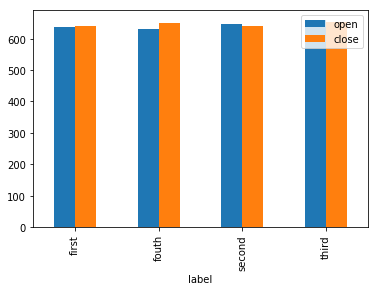

In [185]:
stock.groupby('label').mean().plot(kind='bar')

# How do I explore a pandas Series?


In [186]:
stock.describe()

,open,close
count,10.000000,10.000000
mean,640.849000,642.876000
std,19.205074,17.414331
min,615.420000,616.690000
25%,626.462500,628.607500
50%,632.750000,644.475000
75%,657.772500,652.995000
max,669.980000,668.200000


In [187]:
stock.dtypes

date      object
open     float64
close    float64
label     object
dtype: object

In [189]:
stock.label.describe()

count        10
unique        4
top       first
freq          6
Name: label, dtype: object

In [190]:
stock.label.value_counts()

first     6
second    2
fouth     1
third     1
Name: label, dtype: int64

In [191]:
stock.label.value_counts(normalize=True)

first     0.6
second    0.2
fouth     0.1
third     0.1
Name: label, dtype: float64

In [192]:
print(stock.label.unique())
print(stock.label.nunique())

['first' 'second' 'third' 'fouth']
4


In [193]:
pd.crosstab(stock.label, stock.date)

date,2017-12-04,2017-12-05,2017-12-06,2017-12-07,2017-12-08,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15
label,,,,,,,,,,
first,1,1,1,0,1,0,0,1,0,1
fouth,0,0,0,0,0,1,0,0,0,0
second,0,0,0,1,0,0,0,0,1,0
third,0,0,0,0,0,0,1,0,0,0


In [195]:
stock.open.describe()

count     10.000000
mean     640.849000
std       19.205074
min      615.420000
25%      626.462500
50%      632.750000
75%      657.772500
max      669.980000
Name: open, dtype: float64

In [196]:
stock.open.value_counts()

669.98    1
615.42    1
623.95    1
624.95    1
654.99    1
658.70    1
634.00    1
631.50    1
631.00    1
664.00    1
Name: open, dtype: int64

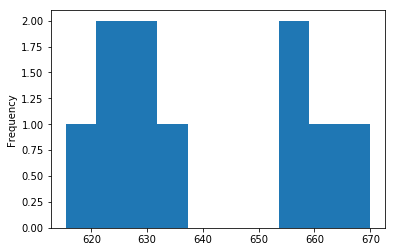

In [197]:
stock.open.plot(kind='hist')

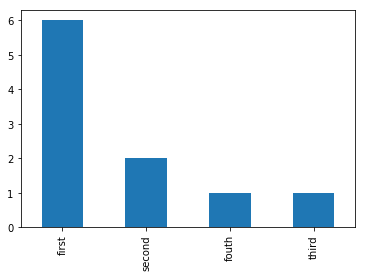

In [199]:
stock.label.value_counts().plot(kind='bar')

# How do I handle missing values in pandas?

In [208]:
stock.loc[10] = ['2017-12-17', np.nan, np.nan, np.nan]
stock.loc[11] = ['2017-12-17', np.nan, np.nan, 'Blue']
stock.loc[12] = ['2017-12-17', np.nan, np.nan, 'Yellow']
stock

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first
3,2017-12-12,658.70,651.18,third
4,2017-12-11,631.00,651.00,fouth
5,2017-12-08,615.42,627.16,first
6,2017-12-07,624.95,616.69,second
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [210]:
stock.tail()

,date,open,close,label
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first
10,2017-12-17,NaN,NaN,NaN
11,2017-12-17,NaN,NaN,Blue
12,2017-12-17,NaN,NaN,Yellow


In [211]:
stock.isnull().tail()

,date,open,close,label
8,False,False,False,False
9,False,False,False,False
10,False,True,True,True
11,False,True,True,False
12,False,True,True,False


In [213]:
stock.notnull().tail()

,date,open,close,label
8,True,True,True,True
9,True,True,True,True
10,True,False,False,False
11,True,False,False,True
12,True,False,False,True


In [216]:
stock.isnull().sum(axis=0)

date     0
open     3
close    3
label    1
dtype: int64

In [215]:
pd.Series([True, False, True]).sum()

2

In [218]:
stock[stock.open.isnull()]

,date,open,close,label
10,2017-12-17,NaN,NaN,NaN
11,2017-12-17,NaN,NaN,Blue
12,2017-12-17,NaN,NaN,Yellow


In [219]:
stock.shape

(13, 4)

In [220]:
stock.dropna(how='any').shape

(10, 4)

In [221]:
stock.dropna(how='any', axis=1).shape

(13, 1)

In [222]:
stock.dropna(how='all').shape

(13, 4)

In [223]:
stock.dropna(subset=['open', 'label'], how='all')

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first
3,2017-12-12,658.70,651.18,third
4,2017-12-11,631.00,651.00,fouth
5,2017-12-08,615.42,627.16,first
6,2017-12-07,624.95,616.69,second
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [224]:
stock.label.value_counts(dropna=False)

first     6
second    2
fouth     1
third     1
Yellow    1
Blue      1
NaN       1
Name: label, dtype: int64

In [225]:
stock.label.fillna(value='Red')

0      first
1     second
2      first
3      third
4      fouth
5      first
6     second
7      first
8      first
9      first
10       Red
11      Blue
12    Yellow
Name: label, dtype: object

# pandas index

In [226]:
stock.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [227]:
stock.columns

Index(['date', 'open', 'close', 'label'], dtype='object')

In [228]:
stock.loc[10, 'open']

nan

In [231]:
stock.set_index('label').loc['first', 'open']

label
first    664.00
first    654.99
first    615.42
first    631.50
first    634.00
first    623.95
Name: open, dtype: float64

In [232]:
stock.set_index('label').index.name

'label'

In [233]:
stock.reset_index()

,index,date,open,close,label
0,0,2017-12-15,664.00,653.60,first
1,1,2017-12-14,669.98,664.68,second
2,2,2017-12-13,654.99,668.20,first
3,3,2017-12-12,658.70,651.18,third
4,4,2017-12-11,631.00,651.00,fouth
5,5,2017-12-08,615.42,627.16,first
6,6,2017-12-07,624.95,616.69,second
7,7,2017-12-06,631.50,625.35,first
8,8,2017-12-05,634.00,632.95,first
9,9,2017-12-04,623.95,637.95,first


In [234]:
stock.describe()

,open,close
count,10.000000,10.000000
mean,640.849000,642.876000
std,19.205074,17.414331
min,615.420000,616.690000
25%,626.462500,628.607500
50%,632.750000,644.475000
75%,657.772500,652.995000
max,669.980000,668.200000


In [235]:
stock.describe().loc['25%', 'open']

626.46250000000009

In [240]:
cal = pd.Series([100, 20], index=['first', 'second'], name='cal')
cal

first     100
second     20
Name: cal, dtype: int64

In [245]:
stock.set_index('label').open*cal

Blue          NaN
Yellow        NaN
first     66400.0
first     65499.0
first     61542.0
first     63150.0
first     63400.0
first     62395.0
fouth         NaN
second    13399.6
second    12499.0
third         NaN
NaN           NaN
dtype: float64

# How to select rows and columns from DataFrame?

``` python
DataFrame.loc[]
DataFrame.iloc[]
DataFrame.ix[]
```

In [251]:
# inclusive of 2
stock.loc[0:2, :]

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first


In [253]:
stock.loc[:, 'date':'close']

,date,open,close
0,2017-12-15,664.00,653.60
1,2017-12-14,669.98,664.68
2,2017-12-13,654.99,668.20
3,2017-12-12,658.70,651.18
4,2017-12-11,631.00,651.00
5,2017-12-08,615.42,627.16
6,2017-12-07,624.95,616.69
7,2017-12-06,631.50,625.35
8,2017-12-05,634.00,632.95
9,2017-12-04,623.95,637.95


In [255]:
stock.loc[stock.label=='first',:]

,date,open,close,label
0,2017-12-15,664.00,653.60,first
2,2017-12-13,654.99,668.20,first
5,2017-12-08,615.42,627.16,first
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [256]:
stock[stock.label == 'first']

,date,open,close,label
0,2017-12-15,664.00,653.60,first
2,2017-12-13,654.99,668.20,first
5,2017-12-08,615.42,627.16,first
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [257]:
stock.loc[stock.label=='first','open']

0    664.00
2    654.99
5    615.42
7    631.50
8    634.00
9    623.95
Name: open, dtype: float64

In [259]:
# exclusive on the end side, use index position
stock.iloc[:,1:4]

,open,close,label
0,664.00,653.60,first
1,669.98,664.68,second
2,654.99,668.20,first
3,658.70,651.18,third
4,631.00,651.00,fouth
5,615.42,627.16,first
6,624.95,616.69,second
7,631.50,625.35,first
8,634.00,632.95,first
9,623.95,637.95,first


In [260]:
stock[['open','close']]
# recommand stock.loc[:, ['open', 'close']]

,open,close
0,664.00,653.60
1,669.98,664.68
2,654.99,668.20
3,658.70,651.18
4,631.00,651.00
5,615.42,627.16
6,624.95,616.69
7,631.50,625.35
8,634.00,632.95
9,623.95,637.95


In [261]:
stock.loc[:, ['open', 'close']]

,open,close
0,664.00,653.60
1,669.98,664.68
2,654.99,668.20
3,658.70,651.18
4,631.00,651.00
5,615.42,627.16
6,624.95,616.69
7,631.50,625.35
8,634.00,632.95
9,623.95,637.95


In [262]:
stock.ix[0, 'date']

'2017-12-15'

# pandas category

``` python
DataFrame.info(memory_usage='deep')
DataFrame.memory_usage(deep = True)
DataFrame['col_name'] = DataFrame.col_name.astype('category')
```

In [264]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 4 columns):
date     13 non-null object
open     10 non-null float64
close    10 non-null float64
label    12 non-null object
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [263]:
stock.ix[0, 0]

'2017-12-15'

In [265]:
stock.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 4 columns):
date     13 non-null object
open     10 non-null float64
close    10 non-null float64
label    12 non-null object
dtypes: float64(2), object(2)
memory usage: 2.7 KB


In [267]:
stock.memory_usage(deep = True)

Index    744
date     893
open     104
close    104
label    926
dtype: int64

In [268]:
stock.memory_usage(deep = True).sum()

2771

In [271]:
stock.dropna(subset=['label'], how='any', inplace=True)
stock

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first
3,2017-12-12,658.70,651.18,third
4,2017-12-11,631.00,651.00,fouth
5,2017-12-08,615.42,627.16,first
6,2017-12-07,624.95,616.69,second
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [272]:
stock.label.unique()

array(['first', 'second', 'third', 'fouth', 'Blue', 'Yellow'], dtype=object)

In [273]:
stock['label'] = stock.label.astype('category')

In [274]:
stock.dtypes

date       object
open      float64
close     float64
label    category
dtype: object

In [275]:
stock.label.head()

0     first
1    second
2     first
3     third
4     fouth
Name: label, dtype: category
Categories (6, object): [Blue, Yellow, first, fouth, second, third]

In [276]:
stock.label.cat.codes.head()

0    2
1    4
2    2
3    5
4    3
dtype: int8

In [277]:
stock.memory_usage(deep = True)

Index    416
date     804
open      96
close     96
label    619
dtype: int64

In [279]:
df = pd.DataFrame({'ID':[100,101,102,103], 'quality':['good','very good','good','excellent']})

In [280]:
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [281]:
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [282]:
df['quality'] = df.quality.astype('category',categories=['good','very good','excellent'], ordered=True)

In [283]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [285]:
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


In [286]:
df.to_pickle('test.pkl')
pd.read_pickle('test.pkl')

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [289]:
df.sample(n=1, random_state=42)

,ID,quality
1,101,very good


In [292]:
df.sample(frac=0.5, random_state=99)

,ID,quality
2,102,good
0,100,good


In [293]:
train = df.sample(frac=0.5, random_state=99)
test = df.loc[~df.index.isin(train.index),:]

In [294]:
train

,ID,quality
2,102,good
0,100,good


In [295]:
test

,ID,quality
1,101,very good
3,103,excellent


# How do I create dummy variables in pandas?

In [296]:
stock

,date,open,close,label
0,2017-12-15,664.00,653.60,first
1,2017-12-14,669.98,664.68,second
2,2017-12-13,654.99,668.20,first
3,2017-12-12,658.70,651.18,third
4,2017-12-11,631.00,651.00,fouth
5,2017-12-08,615.42,627.16,first
6,2017-12-07,624.95,616.69,second
7,2017-12-06,631.50,625.35,first
8,2017-12-05,634.00,632.95,first
9,2017-12-04,623.95,637.95,first


In [297]:
stock.dropna(how='any', inplace=True)

In [308]:
stock.open>635

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: open, dtype: bool

In [309]:
stock['price'] = ['High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low']
stock['set_price'] = stock.price.map({'High':1, 'Low':0})
stock

,date,open,close,label,price,set_price
0,2017-12-15,664.00,653.60,first,High,1
1,2017-12-14,669.98,664.68,second,High,1
2,2017-12-13,654.99,668.20,first,High,1
3,2017-12-12,658.70,651.18,third,High,1
4,2017-12-11,631.00,651.00,fouth,Low,0
5,2017-12-08,615.42,627.16,first,Low,0
6,2017-12-07,624.95,616.69,second,Low,0
7,2017-12-06,631.50,625.35,first,Low,0
8,2017-12-05,634.00,632.95,first,Low,0
9,2017-12-04,623.95,637.95,first,Low,0


In [314]:
set_price = pd.get_dummies(stock.price, prefix='Is ').iloc[:,0]
stock = pd.concat([stock, set_price], axis=1)
stock

,date,open,close,label,price,set_price,Is _High
0,2017-12-15,664.00,653.60,first,High,1,1
1,2017-12-14,669.98,664.68,second,High,1,1
2,2017-12-13,654.99,668.20,first,High,1,1
3,2017-12-12,658.70,651.18,third,High,1,1
4,2017-12-11,631.00,651.00,fouth,Low,0,0
5,2017-12-08,615.42,627.16,first,Low,0,0
6,2017-12-07,624.95,616.69,second,Low,0,0
7,2017-12-06,631.50,625.35,first,Low,0,0
8,2017-12-05,634.00,632.95,first,Low,0,0
9,2017-12-04,623.95,637.95,first,Low,0,0


In [315]:
pd.get_dummies(stock, columns=['price'],drop_first=True)

,date,open,close,label,set_price,Is _High,price_Low
0,2017-12-15,664.00,653.60,first,1,1,0
1,2017-12-14,669.98,664.68,second,1,1,0
2,2017-12-13,654.99,668.20,first,1,1,0
3,2017-12-12,658.70,651.18,third,1,1,0
4,2017-12-11,631.00,651.00,fouth,0,0,1
5,2017-12-08,615.42,627.16,first,0,0,1
6,2017-12-07,624.95,616.69,second,0,0,1
7,2017-12-06,631.50,625.35,first,0,0,1
8,2017-12-05,634.00,632.95,first,0,0,1
9,2017-12-04,623.95,637.95,first,0,0,1


# How do I work with dates and times in pandas?

In [317]:
stock['Time'] = pd.to_datetime(stock.date)
stock

,date,open,close,label,price,set_price,Is _High,Time
0,2017-12-15,664.00,653.60,first,High,1,1,2017-12-15
1,2017-12-14,669.98,664.68,second,High,1,1,2017-12-14
2,2017-12-13,654.99,668.20,first,High,1,1,2017-12-13
3,2017-12-12,658.70,651.18,third,High,1,1,2017-12-12
4,2017-12-11,631.00,651.00,fouth,Low,0,0,2017-12-11
5,2017-12-08,615.42,627.16,first,Low,0,0,2017-12-08
6,2017-12-07,624.95,616.69,second,Low,0,0,2017-12-07
7,2017-12-06,631.50,625.35,first,Low,0,0,2017-12-06
8,2017-12-05,634.00,632.95,first,Low,0,0,2017-12-05
9,2017-12-04,623.95,637.95,first,Low,0,0,2017-12-04


In [319]:
stock.Time.dt.dayofyear

0    349
1    348
2    347
3    346
4    345
5    342
6    341
7    340
8    339
9    338
Name: Time, dtype: int64

In [320]:
stock.Time.dt.weekday_name

0       Friday
1     Thursday
2    Wednesday
3      Tuesday
4       Monday
5       Friday
6     Thursday
7    Wednesday
8      Tuesday
9       Monday
Name: Time, dtype: object

In [322]:
ts = pd.to_datetime('2017-12-08')
stock.loc[stock.Time > ts, :]

,date,open,close,label,price,set_price,Is _High,Time
0,2017-12-15,664.00,653.60,first,High,1,1,2017-12-15
1,2017-12-14,669.98,664.68,second,High,1,1,2017-12-14
2,2017-12-13,654.99,668.20,first,High,1,1,2017-12-13
3,2017-12-12,658.70,651.18,third,High,1,1,2017-12-12
4,2017-12-11,631.00,651.00,fouth,Low,0,0,2017-12-11


In [323]:
stock.Time.max()-stock.Time.min()

Timedelta('11 days 00:00:00')

In [328]:
stock.Year.value_counts().sort_index()

Friday       2
Monday       2
Thursday     2
Tuesday      2
Wednesday    2
Name: Year, dtype: int64

# How do I find and remove duplicate rows in pandas?

In [331]:
stock.label.duplicated()

0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: label, dtype: bool

In [335]:
stock.loc[stock.label.duplicated(keep='first'),:]

,date,open,close,label,price,set_price,Is _High,Time,Year
2,2017-12-13,654.99,668.20,first,High,1,1,2017-12-13,Wednesday
5,2017-12-08,615.42,627.16,first,Low,0,0,2017-12-08,Friday
6,2017-12-07,624.95,616.69,second,Low,0,0,2017-12-07,Thursday
7,2017-12-06,631.50,625.35,first,Low,0,0,2017-12-06,Wednesday
8,2017-12-05,634.00,632.95,first,Low,0,0,2017-12-05,Tuesday
9,2017-12-04,623.95,637.95,first,Low,0,0,2017-12-04,Monday


In [336]:
stock.loc[stock.label.duplicated(keep=False),:]

,date,open,close,label,price,set_price,Is _High,Time,Year
0,2017-12-15,664.00,653.60,first,High,1,1,2017-12-15,Friday
1,2017-12-14,669.98,664.68,second,High,1,1,2017-12-14,Thursday
2,2017-12-13,654.99,668.20,first,High,1,1,2017-12-13,Wednesday
5,2017-12-08,615.42,627.16,first,Low,0,0,2017-12-08,Friday
6,2017-12-07,624.95,616.69,second,Low,0,0,2017-12-07,Thursday
7,2017-12-06,631.50,625.35,first,Low,0,0,2017-12-06,Wednesday
8,2017-12-05,634.00,632.95,first,Low,0,0,2017-12-05,Tuesday
9,2017-12-04,623.95,637.95,first,Low,0,0,2017-12-04,Monday


# How do I avoid a SettingWithCopyWaring in pandas?

In [340]:
stock_high = stock.loc[stock.set_price>0, :]
stock_high.loc[0, 'open'] = 665.0

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [341]:
stock_high = stock.loc[stock.set_price>0, :].copy()
stock_high.loc[0, 'open'] = 665.0

# pandas get_option()

In [342]:
pd.get_option('display.max_rows')

60

In [343]:
pd.set_option('display.max_rows', 10)

In [345]:
pd.reset_option('display.max_rows')
pd.get_option('display.max_rows')

60

In [346]:
pd.get_option('display.max_columns')

20

In [347]:
pd.get_option('display.max_colwidth')

50

In [348]:
pd.get_option('display.precision')

6

In [349]:
pd.set_option('display.precision', 2)
stock

,date,open,close,label,price,set_price,Is _High,Time,Year
0,2017-12-15,665.00,653.60,first,High,1,1,2017-12-15,Friday
1,2017-12-14,669.98,664.68,second,High,1,1,2017-12-14,Thursday
2,2017-12-13,654.99,668.20,first,High,1,1,2017-12-13,Wednesday
3,2017-12-12,658.70,651.18,third,High,1,1,2017-12-12,Tuesday
4,2017-12-11,631.00,651.00,fouth,Low,0,0,2017-12-11,Monday
5,2017-12-08,615.42,627.16,first,Low,0,0,2017-12-08,Friday
6,2017-12-07,624.95,616.69,second,Low,0,0,2017-12-07,Thursday
7,2017-12-06,631.50,625.35,first,Low,0,0,2017-12-06,Wednesday
8,2017-12-05,634.00,632.95,first,Low,0,0,2017-12-05,Tuesday
9,2017-12-04,623.95,637.95,first,Low,0,0,2017-12-04,Monday


In [352]:
pd.describe_option('row')

display.latex.multirow : bool
    This specifies if the to_latex method of a Dataframe uses multirows
    to pretty-print MultiIndex rows.
    Valid values: False,True
    [default: False] [currently: False]

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, 